In [1]:
import sympy as sp
from sympy.abc import t, u, v, w
from einsteinpy.symbolic import MetricTensor, RicciTensor, RicciScalar, RiemannCurvatureTensor, EinsteinTensor
from einsteinpy.symbolic.christoffel import ChristoffelSymbols
import numpy as np
from IPython.display import Markdown as md
from IPython.display import display, Latex

sp.init_printing()
f = sp.Function('f')(u, v)

In [4]:
vars_ = ["t", "u", "v", "w"] 

def print_ein(ein):
    ein = ein.simplify()
    for i, c1 in enumerate(vars_):
        for j, c2 in enumerate(vars_):
            if ein[i, j] != (u - u).simplify():
                display((c1, c2), ein[i, j])
                print("\n\n")

In [2]:
x = (1+v * sp.cos(u/2))*sp.cos(u)
y = (1+v * sp.cos(u/2))*sp.sin(u)
z = v * sp.sin(u/2)

dxu = x.diff(u)
dxv = x.diff(v)
dyu = y.diff(u)
dyv = y.diff(v)
dzu = z.diff(u)
dzv = z.diff(v)

du2 = (dxu**2 + dyu**2 + dzu**2).simplify()
dv2 = (dxv**2 + dyv**2 + dzv**2).simplify()

ds_ = [du2, dv2]

out = "ds^2 ="
vars_ = ["u", "v"] 

for i in range(2):
    out += f"+\\left({sp.latex(ds_[i].simplify())}\\right)d{vars_[i]}^2"
    
md("Line element: \n$${}$$".format(out))

Line element: 
$$ds^2 =+\left(v^{2} \cos^{2}{\left(\frac{u}{2} \right)} + \frac{v^{2}}{4} + 2 v \cos{\left(\frac{u}{2} \right)} + 1\right)du^2+\left(1\right)dv^2$$

('t', 't')

/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: Matpl

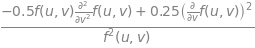

('w', 'w')

/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: Matpl

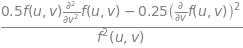

In [5]:
g = MetricTensor(
    sp.Array(
        np.diag([1, -f, -1, -1]
               )
    ),
    syms=[t, u, v, w]
)
    
g.tensor()

einstein = EinsteinTensor.from_metric(g)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

einstein.tensor().simplify()
print_ein(einstein)

In [13]:
e=einstein.tensor()

e[0, 0].equals(-e[3, 3])

True

/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: Matpl

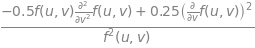

In [10]:
e[0, 0]

In [15]:
c1 = sp.Function("c_1")(u)
c2 = sp.Function("c_2")(u)

f = 1/4*(v*c1 + c2)**2

-0.5*f*f.diff(v, 2) + 0.25*f.diff(v)**2

/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/hussain/miniconda3/lib/python3.8/site-packages/IPython/lib/latextools.py:126: Matpl